# topics: BMW DATASETS WORKS 

In [334]:
import pandas as pd 
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor,LogisticRegression
from sklearn.metrics import accuracy_score,r2_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder,MinMaxScaler
import pickle
from sklearn.impute import SimpleImputer
import seaborn as sns


In [336]:
data=pd.read_csv(r"C:\Users\mdfir\Downloads\BMW sales data (2010-2024) (1) (1).csv")

In [338]:
data.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [340]:
data.drop(columns=["Model"],inplace=True)

In [342]:
data.head()

,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [344]:
data["Sales_Classification"].value_counts()

Sales_Classification
Low     34754
High    15246
Name: count, dtype: int64

In [346]:
data.isnull().sum()

Year                    0
Region                  0
Color                   0
Fuel_Type               0
Transmission            0
Engine_Size_L           0
Mileage_KM              0
Price_USD               0
Sales_Volume            0
Sales_Classification    0
dtype: int64

In [348]:
x=data.drop(columns=["Sales_Classification"])
y=data["Sales_Classification"]

In [350]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=20)

In [373]:
l=LabelEncoder()

In [377]:
y_train_l=l.fit_transform(y_train)
y_test_l=l.transform(y_test)

<Axes: >

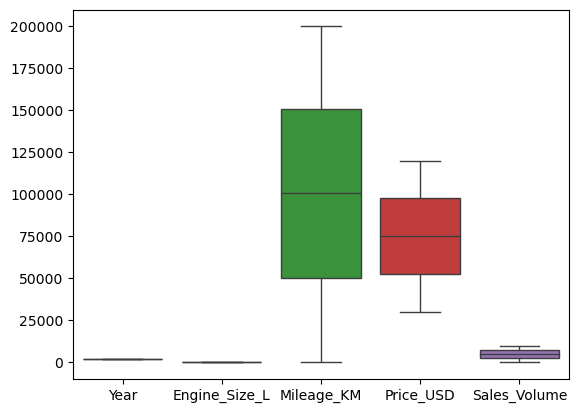

In [379]:
sns.boxplot(x_train)

In [381]:
cat_one_cal=["Region","Color","Fuel_Type","Transmission"]
num_cal=["Mileage_KM","Sales_Volume","Year","Engine_Size_L","Price_USD"]



In [383]:
cat_one_pipeline=Pipeline([

("OneHotEncoder",OneHotEncoder(handle_unknown="ignore",sparse_output=False))    
])

In [385]:
num_pipeline=Pipeline([
("scaling",MinMaxScaler())    
])

In [388]:
preprocess=ColumnTransformer([
("cat_one_pipeline",cat_one_pipeline,cat_one_cal),
    ("num_pipeline",num_pipeline,num_cal)
])

In [390]:
pip=Pipeline([
    ("preprocess",preprocess),
    ("model",LogisticRegression())
])

In [392]:
pip.fit(x_train,y_train_l)

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat_one_pipeline', ...), ('num_pipeline', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [396]:
pred=pip.predict(x_test)

In [398]:
pred

array([0, 1, 1, ..., 0, 0, 0])

In [402]:
score=accuracy_score(y_test_l,pred)

In [404]:
score

0.9989

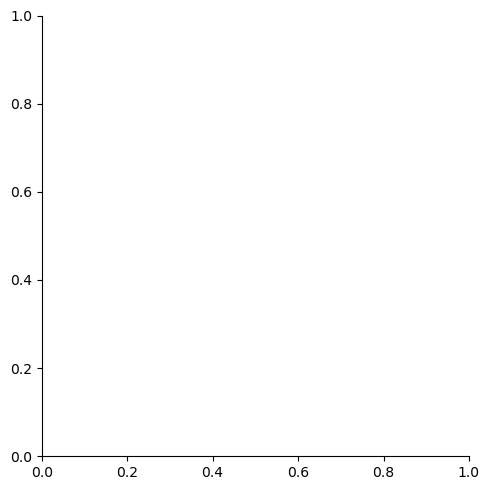